Origin: 0 Goal: 249
N: 250 Iterations: 40000 Data: data250-20000a.csv
Sparsity: 0.97 gamma: 0.65
Blocked: [158, 10, 55]
Path length: 4
Shortest path: [0, 63, 169, 211, 249]
Time: 26.032241344451904


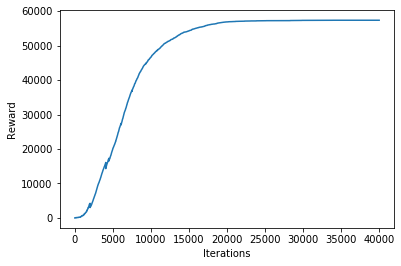

Correct path


In [50]:
#https://www.geeksforgeeks.org/ml-reinforcement-learning-algorithm-python-implementation-using-q-learning/
import time
import random
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt

def generate_matrix(prob_sparsity, N):
    matrix = np.zeros((N, N))
    edges = []
    for i in range(0, N):
        for j in range(0, i):
            if random.random() > prob_sparsity:
                matrix[i][j] = 1
                matrix[j][i] = matrix[i][j]
                edges.append((i,j))
    return matrix, edges

def loadfromfile(filename='data.csv'):
    mat = np.loadtxt(filename, delimiter=',')
    N = mat.shape[0]
    edges = []
    for i in range(0, N):
        for j in range(0, i):
            if mat[i,j] == 1:
                edges.append((i,j))
    return mat, edges, N

# Find which are the valid available actions for a given state
def available_actions(curr_state, matrix_): 
    all_actions = matrix_[curr_state, :] 
    available_actions = np.where(all_actions >= 0)[1] 
    return available_actions 

# Choose one of the available valid actions for the current state at random
def choose_random_action(valid_actions): 
    random_action = int(np.random.choice(valid_actions, 1)) 
    return random_action

def update_Q_table(current_state, action, Q_table, adjacency_matrix, gamma): 
    max_reward_index = np.where(Q_table[action, :] == np.max(Q_table[action, :]))[1] 
    if max_reward_index.shape[0] > 1:
        max_reward_index = int(np.random.choice(max_reward_index, size = 1)) 
    else:
        max_reward_index = int(max_reward_index) 
    max_value = Q_table[action, max_reward_index] 
    Q_table[current_state, action] = adjacency_matrix[current_state, action] + gamma * max_value 
    if (np.max(Q_table) > 0): 
        return(np.sum(Q_table / np.max(Q_table)*100))
    else: 
        return (0) 

def draw_network(edges):
    G = nx.Graph() 
    G.add_edges_from(edges) 
    pos = nx.spring_layout(G) 
    nx.draw_networkx_nodes(G, pos) 
    nx.draw_networkx_edges(G, pos) 
    nx.draw_networkx_labels(G, pos) 
    plt.show() 

def build_adjacency_matrix(N, edges):
    adjacency_matrix = np.matrix(np.ones(shape =(N, N))) 
    adjacency_matrix *= -1
    
    for coord in edges:  
        if coord[1] == goal: 
            adjacency_matrix[coord] = 100
        else: 
            adjacency_matrix[coord] = 0

        if coord[0] == goal: 
            adjacency_matrix[coord[::-1]] = 100
        else: 
            adjacency_matrix[coord[::-1]]= 0
          # reverse of point 
    return adjacency_matrix

def init_Q_table(N, adjacency_matrix, gamma, initial_state):
    # initialize Q_table with zeros
    Q = np.matrix(np.zeros([N, N])) 
    available_action = available_actions(initial_state, adjacency_matrix) 
    action = choose_random_action(available_action) 

    # update the Q_table according to the chosen action
    update_Q_table(initial_state, action, Q, adjacency_matrix, gamma) 
    return Q

def percolate_reward(Q_table, adjacency_matrix, gamma, rounds):
    scores = [] 
    for i in range(rounds): 
        current_state = np.random.randint(0, int(Q_table.shape[0])) 
        available_action = available_actions(current_state, adjacency_matrix) 
        action = choose_random_action(available_action) 
        score = update_Q_table(current_state, action, Q_table, adjacency_matrix, gamma) 
        scores.append(score) 
    return scores

def run(origin, goal, Q_table):
    cur_st = origin
    steps = [cur_st] 

    while cur_st != goal: 
        max_reward_idx = np.where(Q_table[cur_st, :] == np.max(Q_table[cur_st, :]))[1] 
        if max_reward_idx.shape[0] > 1: 
            max_reward_idx = int(np.random.choice(max_reward_idx, size = 1)) 
        else: 
            max_reward_idx = int(max_reward_idx) 
        steps.append(max_reward_idx) 
        cur_st = max_reward_idx 
    return steps

def draw_scores(scores):
    plt.plot(scores) 
    plt.xlabel('Iterations') 
    plt.ylabel('Reward') 
    plt.show() 

def check_path(mat, path):
    result = 'Correct path'
    for idx in range(len(path)-1):
        if mat[path[idx]][path[idx+1]] != 1:
            print(mat[path[idx]][path[idx+1]], "wrong")
            result = None
    if result:
        print(result)

def block(nodes, adjacency_matrix):
    for node in nodes:
        blocked = np.where(adjacency_matrix[:, node] == 0)  
        adjacency_matrix[blocked[0], node] = -100

if __name__ == "__main__":
    t1 = time.time()
    file_exists = True
    rounds = 40000
    if file_exists:
        filename = 'data250-20000a.csv'
        matrix, edges, N = loadfromfile(filename)
        prob_sparsity = 0.97
    else:
        #The number of nodes in the network
        N = 250
        prob_sparsity = 0.97
        matrix, edges = generate_matrix(prob_sparsity, N)
        filename = 'data'+str(N)+'-'+str(rounds)+'a.csv'
        np.savetxt(filename, matrix, delimiter=',')
        
    goal = N - 1
    origin = 0
    #draw_network(edges)
    adjacency_matrix = build_adjacency_matrix(N, edges)
    block_nodes = [158, 10, 55]
    block(block_nodes, adjacency_matrix)
    # learning rate     
    gamma = 0.65
    Q_table = init_Q_table(N, adjacency_matrix, gamma, origin)
    scores = percolate_reward(Q_table, adjacency_matrix, gamma, rounds) 
    steps = run(origin, goal, Q_table)
    print("Origin:", origin, "Goal:", goal)
    print("N:", N, "Iterations:", rounds, "Data:", filename)
    print("Sparsity:", prob_sparsity, "gamma:", gamma)
    print("Blocked:", block_nodes)
    print("Path length:", len(steps)-1) 
    print("Shortest path:", steps)
    print("Time:", time.time()-t1)
    draw_scores(scores)
    check_path(matrix, steps)

In [32]:
adjacency_matrix[4,2]

-1.0